In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

# Описание работы

Компания, которая активно занимается Big Data и Data Science, хочет нанять специалистов по анализу данных среди людей, которые успешно проходят некоторые курсы, проводимые компанией. Компания хочет знать, кто из этих кандидатов действительно хочет работать в компании после обучения или поиска новой работы, потому что это помогает снизить стоимость и время, а также качество обучения или планирования курсов и категоризации кандидатов.

Этот набор данных предназначен для понимания факторов, которые заставляют человека уйти с текущей работы для HR-исследований. По данным модели нужно пешить задачу классификации того, будет ли кандидат искать новую работу или же будет работать в компании.

## 1. Загрузка и чтение данных

In [2]:
url = "https://raw.githubusercontent.com/emelkhovsky/machine-leaarning-course/master/aug_train.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(19158, 14)

Таблица содержит информацию о порядка 20 тысяч кандидатов.

In [3]:
data_raw.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


5 rows × 14 columns

Каждый кандидат охарактеризован 13 признаками.

Будем считать, что первый столбец - id кандидата - не признак, поскольку по id ничего нельзя сказать. 

Рассмотрим отдельно каждый признак:

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

1. enrollee_id : Уникальный идентификатор кандидата - числовой
2. city: Код города - категориальный
3. city_ development _index : Индекс развития города - числовой
4. gender: Пол кандидата - категориальный
5. relevent_experience: Соответствующий опыт кандидата - категориальный
6. enrolled_university: Тип университетского курса, зачисленного, если таковой имеется - категориальный
7. education_level: Уровень образования кандидата - категориальный
8. major_discipline :Образование основной дисциплины кандидата - категориальный
9. experience: Общий опыт кандидата в годах - категориальный
10. company_size: Количество сотрудников в компании текущего работодателя - категориальный
11. company_type : Тип текущего работодателя - категориальный
12. lastnewjob: Разница в годах между предыдущей и текущей работой - категориальный
13. training_hours: сколько завершено учебных часов - числовой
14. target: 0 – Не хочет менять работу, 1 – Хочет сменить работу - числовой

Заменим тип Object категориальных признаков на специальный тип, который предназначен для хранения как раз таких категориальных значений(заодно увидим на какаие категориии делится каждый из признаков):

In [5]:

data_raw['city'] = data_raw['city'].astype('category')
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['relevent_experience'] = data_raw['relevent_experience'].astype('category')
data_raw['enrolled_university'] = data_raw['enrolled_university'].astype('category')
data_raw['education_level'] = data_raw['education_level'].astype('category')
data_raw['major_discipline'] = data_raw['major_discipline'].astype('category')
data_raw['experience'] = data_raw['experience'].astype('category')
data_raw['company_size'] = data_raw['company_size'].astype('category')
data_raw['company_type'] = data_raw['company_type'].astype('category')
data_raw['last_new_job'] = data_raw['last_new_job'].astype('category')

data_raw['city'].dtype

CategoricalDtype(categories=['city_1', 'city_10', 'city_100', 'city_101', 'city_102',
                  'city_103', 'city_104', 'city_105', 'city_106', 'city_107',
                  ...
                  'city_84', 'city_89', 'city_9', 'city_90', 'city_91',
                  'city_93', 'city_94', 'city_97', 'city_98', 'city_99'],
, ordered=False)

In [6]:
data_raw['gender'].dtype

CategoricalDtype(categories=['Female', 'Male', 'Other'], ordered=False)

In [7]:
data_raw['relevent_experience'].dtype

CategoricalDtype(categories=['Has relevent experience', 'No relevent experience'], ordered=False)

In [8]:
data_raw['enrolled_university'].dtype

CategoricalDtype(categories=['Full time course', 'Part time course', 'no_enrollment'], ordered=False)

In [9]:
data_raw['education_level'].dtype

CategoricalDtype(categories=['Graduate', 'High School', 'Masters', 'Phd',
                  'Primary School'],
, ordered=False)

In [10]:
data_raw['major_discipline'].dtype

CategoricalDtype(categories=['Arts', 'Business Degree', 'Humanities', 'No Major', 'Other',
                  'STEM'],
, ordered=False)

In [11]:
data_raw['experience'].dtype

CategoricalDtype(categories=['1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
                  '19', '2', '20', '3', '4', '5', '6', '7', '8', '9', '<1',
                  '>20'],
, ordered=False)

In [12]:
data_raw['company_size'].dtype

CategoricalDtype(categories=['10/49', '100-500', '1000-4999', '10000+', '50-99',
                  '500-999', '5000-9999', '<10'],
, ordered=False)

In [13]:
data_raw['company_type'].dtype

CategoricalDtype(categories=['Early Stage Startup', 'Funded Startup', 'NGO', 'Other',
                  'Public Sector', 'Pvt Ltd'],
, ordered=False)

In [14]:
data_raw['last_new_job'].dtype

CategoricalDtype(categories=['1', '2', '3', '4', '>4', 'never'], ordered=False)

## 2. Визуализация и основные характеристики

Получим информацию о количественных признаках:

In [15]:
data_raw.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Таким образом, мы получили:

1. Count - Количество значений для каждого признака. У каждого признака это число равно 19158. Пропущенных значений нет.
2. Mean - Средние значения.
3. STD - Стандартные отклонения. Данная константа показывает, на сколько в среднем отклоняются варианты от среднего значения.
4. Min/Max - Минимальные/Максимальные значения.
5. 25%, 75% - Пертвый и третий квартили. То есть это значения, которые объект не превышает с вероятностью 25% и 75% соответственно.
6. 50% - Квартиль 50% или медиана.

Рассмотрим несколько самых интересных признаков отдельно.

**city_ development _index** (индекс развития города кандидата). Средний индекс кандидатов приблизительно 0.82. Среднее отклонение невелико, поэтому на анализ почти не влияет.

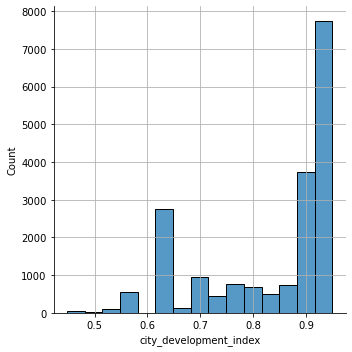

In [16]:
sns.displot(data_raw['city_development_index'], bins=15)
plt.grid()
pass

На гистограмме видно, что кандидатов из городов с лучшим развитием гораздо больше, чем из малоразвитых городов.

**training hours** (кол-во учебных часов), среднее кол-во около 65 часов. Среднее отклонение равно около 60 часам, это значит, что 

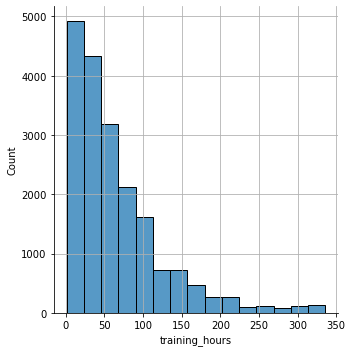

In [17]:
sns.displot(data_raw['training_hours'], bins=15)
plt.grid()
pass

По гистограмме видно, что большинство кандидатов имеет кол-во учебных часов менее 60

Теперь рассмотрим категориальные признаки:

In [18]:
data_raw.describe(include=['category'])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


Для категориальных признаков мы получили такие характеристики, как:

1. Count - Количество значений. Записей 19158, значит есть пропущенные значения почти для каждого категориального признака(небольшие, заисключение типа компании и гендера)
2. Unique - Количество уникальных значений.
3. Top - Наиболее встречающееся значение.
4. Freq - Частота наиболее встречающегося значения.

Вычислим матрицу корреляции для количественных признаков (чтобы выявить связи между признаками):

In [19]:
corr_matrix = data_raw.corr()
corr_matrix

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


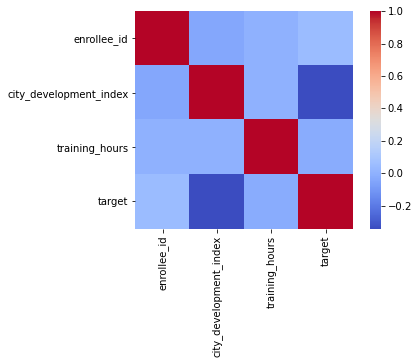

In [20]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
pass

Благодаря визуальному образу корреляционной матрицы можно заметить, что числовые признаки почти никак не свзаны между собой

In [21]:
corr_matrix >= 0.7

,enrollee_id,city_development_index,training_hours,target
enrollee_id,True,False,False,False
city_development_index,False,True,False,False
training_hours,False,False,True,False
target,False,False,False,True


Все числовые признаки вообще никак не связаны между собой, т.к. коэффициент корреляции меньше 0.7.

Рассмотрим категориальные признаки. 

**city**:

In [22]:
data_raw['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_129       3
city_121       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

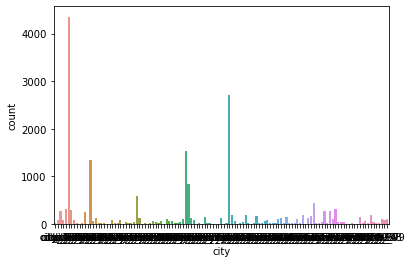

In [23]:
sns.countplot(x='city', data=data_raw)
pass

В данном наборе данных очень много городов, но преимущественно расматриваются кандидаты и города city_103.

In [24]:
data_raw['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

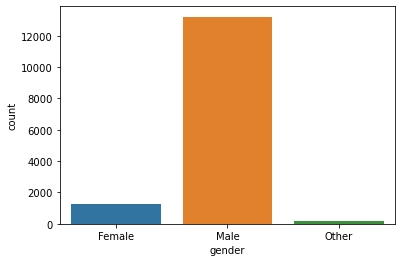

In [25]:
sns.countplot(x='gender', data=data_raw)
pass

По графику видно, что кандидатов-мужчин больше во много раз. Женщин больше чем оставшихся гендеров.

In [26]:
data_raw['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

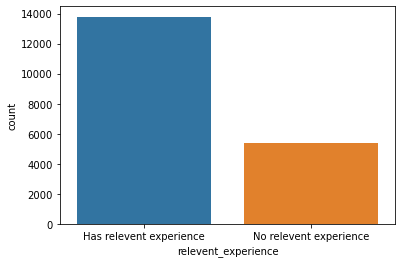

In [27]:
sns.countplot(x='relevent_experience', data=data_raw)
pass

Кандитов, имеющих релевантный опыт больше почти в 2 раза

In [28]:
data_raw['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

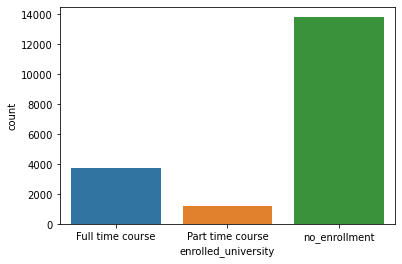

In [29]:
sns.countplot(x='enrolled_university', data=data_raw)
pass

Большинство кандидатов в данный момент не числяться на курсе универстита

In [30]:
data_raw['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

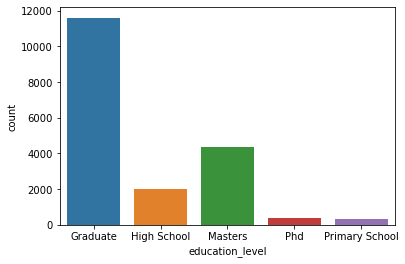

In [31]:
sns.countplot(x='education_level', data=data_raw)
pass

Большинство кандитатов имееют высшее образование, но без магистратуры

In [32]:
data_raw['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

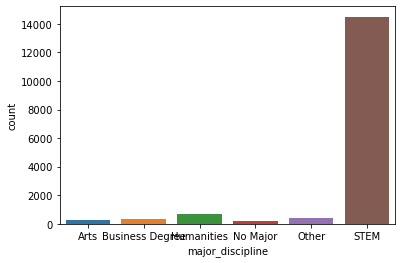

In [33]:
sns.countplot(x='major_discipline', data=data_raw)
pass

Почти все кандидаты заканчивали направления по техническим специальностями, естественным наукам

In [34]:
data_raw['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

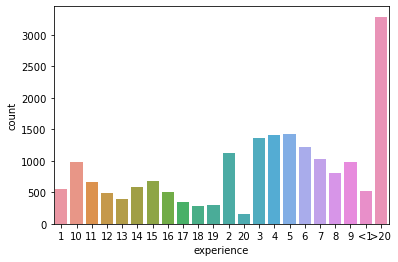

In [35]:
sns.countplot(x='experience', data=data_raw)
pass

Большинство кандидатов имеет опыт больше 20 лет
Остальные года опыта распределны примерно одинаково

In [36]:
data_raw['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

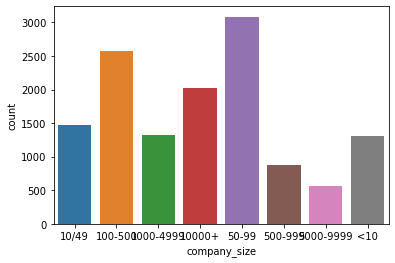

In [37]:
sns.countplot(x='company_size', data=data_raw)
pass

Кандидаты имеели опыт работы в очень разных компаниях разных размеров, но привалируют компании с персоналом 50-99 чел

In [38]:
data_raw['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

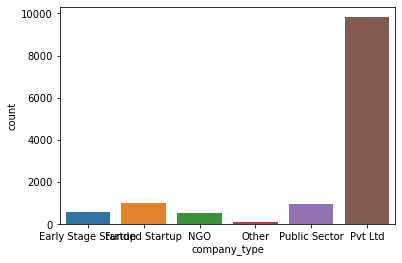

In [39]:
sns.countplot(x='company_type', data=data_raw)
pass

Обычно кандидаты работают в компаниях типа Pvt Ltd - Общество с ограниченной ответственностью

In [40]:
data_raw['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

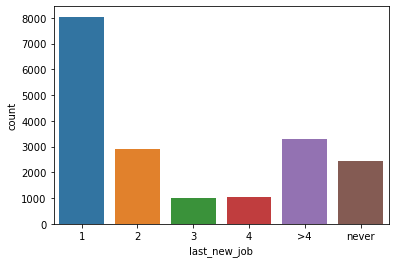

In [41]:
sns.countplot(x='last_new_job', data=data_raw)
pass

Большинство кандидатов очень быстро сменили работу - всего за 1 год

аааы

# Боремся с выбросами (outliers)

In [42]:
data_raw['training_hours'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      2.0
0.010      3.0
0.050      7.0
0.100     11.0
0.500     47.0
0.900    146.0
0.950    188.0
0.990    302.0
0.995    320.0
Name: training_hours, dtype: float64

In [43]:
data_raw['city_development_index'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.527
0.010    0.550
0.050    0.624
0.100    0.624
0.500    0.903
0.900    0.925
0.950    0.926
0.990    0.939
0.995    0.939
Name: city_development_index, dtype: float64

In [44]:
rows_to_drop = data_raw[
    (data_raw['training_hours'] < data_raw['training_hours'].quantile(0.005)) | (data_raw['training_hours'] > data_raw['training_hours'].quantile(0.995)) | 
    (data_raw['city_development_index']  < data_raw['city_development_index' ].quantile(0.005)) | (data_raw['city_development_index']  > data_raw['city_development_index' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(18891, 14)

In [45]:
rows_to_drop

Int64Index([   89,   112,   161,   176,   279,   285,   422,   590,   695,
              705,
            ...
            18273, 18287, 18288, 18458, 18537, 18753, 18915, 18943, 19107,
            19118],
           dtype='int64', length=267)

Взглянем на всевозможные диаграммы рассеивания для каждой пары признаков (возьмем случайные 10%)

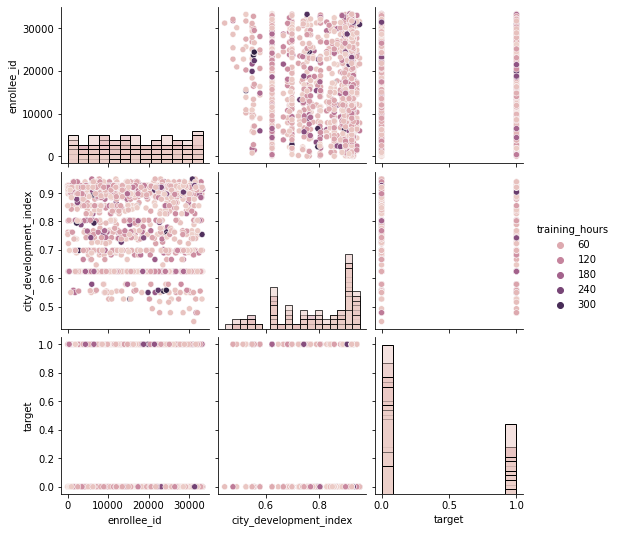

In [46]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=int(0.1 * data_raw.shape[0]), replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='training_hours', diag_kind='hist')

# 3. Обработка пропущенных значений

Подсчитаем пропущенные значения в признаках:

1. gender 4508 - 23%
2. enrolled_university 386 - 2%
3. education_level 460 - 2%
4. major_discipline 2813 - 14%
5. experience 65 - 0.3%
6. company_size 5938 - 30%
7. company_type 6140 - 32%
8. last_new_job 423 - 2% 

Удалим пропущенные значения в тех признаках, где процент их минимален


In [74]:
data_raw.dropna(axis=0, how='all', subset=['enrolled_university'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['education_level'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['experience'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['last_new_job'], inplace=True)
print(data_raw.shape)
data_raw.isna().sum()

(18014, 14)


enrollee_id                  0
city                         0
city_development_index       0
gender                    3863
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2222
experience                   0
company_size              5310
company_type              5476
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [76]:
data_raw['gender'].fillna(data_raw['gender'].mode().iloc[0], inplace=True)
data_raw['major_discipline'].fillna(data_raw['major_discipline'].mode().iloc[0], inplace=True)
data_raw['company_size'].fillna(data_raw['company_size'].mode().iloc[0], inplace=True)
data_raw['company_type'].fillna(data_raw['company_type'].mode().iloc[0], inplace=True)
print(data_raw.shape)
data_raw.isna().sum()

(18014, 14)


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Остальные категориальные пропущенные значения заменям модой

# 4. Обработка категориальных признаков

Закодируем категориальные признаки с помощью числовых признаков, применив метод бинаризации

In [77]:
data_raw = pd.get_dummies(data_raw)
print(data_raw.shape)
data_raw.head()

(18014, 188)


,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,36,1.0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,29725,0.776,47,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,11561,0.624,83,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,666,0.767,8,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,21651,0.764,24,1.0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


# 5. Нормализация количественных признаков

Проведем нормализацию количественных признаков с помощью линейного преобразования к заданному отрезку [0,1]:

In [78]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
count,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,...,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000
mean,0.506387,0.765924,0.192083,0.245420,0.001388,0.004552,0.014378,0.003886,0.015932,0.232819,...,0.027756,0.006328,0.050627,0.829966,0.432386,0.156933,0.055013,0.056068,0.178195,0.121406
std,0.289570,0.243743,0.179281,0.430348,0.037228,0.067317,0.119045,0.062217,0.125216,0.422640,...,0.164278,0.079301,0.219242,0.375673,0.495421,0.363748,0.228012,0.230058,0.382687,0.326607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255482,0.592814,0.065672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.509647,0.922156,0.137313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.758718,0.942116,0.259701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Выбор обучающей и тестовой выборки

Для классификации удовлетворенности клиента будем использовать все признаки за исключением ID. Цель - target.

In [79]:
X = data_normal.drop (['enrollee_id', 'target'], axis=1) 
y = data_raw['target']

Разобьем данные на обучающую (75%) и тестовую (25%) выборки:

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(13510, 4504)

# 7. Обучение модели

## 7.1 KNN

Попробуем сначала классификатор с количеством соседей по умолчанию (5):

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
knn_training_predict = 100 * knn_default.score(X_train, y_train)
knn_test_predict = 100 * knn_default.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 83.05%, Test: 75.42%. 


Теперь 10 ближайших соседей:

In [82]:
knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(X_train, y_train)
knn_training_predict = 100 * knn_10.score(X_train, y_train)
knn_test_predict = 100 * knn_10.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))


Accuracy. Train : 80.54%, Test: 76.49%. 


Видим, что точность полученной модели повысилась,  попробуем 20:

In [86]:
knn_10 = KNeighborsClassifier(n_neighbors = 15)
knn_10.fit(X_train, y_train)
knn_training_predict = 100 * knn_10.score(X_train, y_train)
knn_test_predict = 100 * knn_10.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 80.21%, Test: 77.15%. 


Видно, что на 15 точность на тестовой выборке выше, но немного ниже на обучаемой, далее точной тестовой не растет, а вот обучаемая понижается, значит оптимальное значение при методе ближайших соседей - 15


Вычислим среднеквадратическую ошибку для алгоритма с количеством ближайших соседей по умолчанию:

In [87]:
knn_train_predict = knn_default.score(X_train, y_train)
knn_test_predict = knn_default.score(X_test, y_test)

MSE_train = np.mean((knn_train_predict - y_train)**2)
MSE_test  = np.mean((knn_test_predict - y_test)**2)
print("MSE. Train : {:.2f}, Test: {:.2f}. ".format(MSE_train, MSE_test))

MSE. Train : 0.53, Test: 0.44. 


## 7.2 Decision Tree

Теперь рассмотрим следующий алгоритм - Дерево решений. Сначала снова воспользуемся параметрами по умолчанию, а именно будем считать, что максимальная глубина алгоритма отсутствует.

In [89]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
dct_train_score = 100 * dct.score(X_train, y_train)
print ('Tree Depth:', dct.get_depth())
print ('Tree Leaves:', dct.get_n_leaves())
dct_test_score = 100 * dct.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 45
Tree Leaves: 3100
Accuracy. Train : 99.79%, Test: 71.36%. 


Заметим, что максимальная глубина алгоритма была равна 45. Попробуем уменьшить максимальную глубину до 10:

In [90]:
dct_10 = DecisionTreeClassifier(max_depth=10)
dct_10.fit(X_train,y_train)
dct_train_score = 100 * dct_10.score(X_train, y_train)
print ('Tree Depth:', dct_10.get_depth())
print ('Tree Leaves:', dct_10.get_n_leaves())
dct_test_score = 100 * dct_10.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 10
Tree Leaves: 295
Accuracy. Train : 81.49%, Test: 78.09%. 


Заметим, что качество модели сразу понизилось на обучающей выборке и повысилось на тестовой. 
Поднимем теперь глубину до 20

In [91]:
dct_20 = DecisionTreeClassifier(max_depth=20)
dct_20.fit(X_train,y_train)
dct_train_score = 100 * dct_20.score(X_train, y_train)
print ('Tree Depth:', dct_20.get_depth())
print ('Tree Leaves:', dct_20.get_n_leaves())
dct_test_score = 100 * dct_20.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 20
Tree Leaves: 1617
Accuracy. Train : 91.65%, Test: 73.73%. 


Точно на обучаемой опять повысилась,  а на тестовой немного понизилась

## 7.3 Выводы по алгоритмам

Алгоритм Дерева Решений оказался точнее алгоритма к-ближайших соседей при оптимальных параметрах каждого из методов на обучающей выборке, но не на тестовой.

# 8. Выводы

В данной работе был представлен анализ данных о кандидатах, которые работают/ищут работу, а также решена задача классификации (хотел ли сменить кандидат работу или нет) с помощью моделей, натренированных двумя методами: К-ближайших соседей и Дерева Решений.

Таким образом, перед тем, как тренировать модель, нужно проанализировать данные и их подготовить:
1. Вычислили основные характеристики
2. Проверили пропущенные значени, удалили некоторые, а некоторые заполнили модами
3. Провели бинаризацию номинальных признаков
4. Разбили данные на обучающую и тестовые выборку, попробовали 2 алгоритма для решения задачи классификации. В данной работе алгоритм Дерева Решений оказался лучше метода к-ближайших соседей как по точности в обучаемой выборке.